## Week 3: Predicting with trees, Random Forests, & Model Based Predictions
### Predicting with trees

**Key ideas**
- Iteratively split variables into groups
- Evaluate "homegeneity" within each group
- Split again if necessary

**Pros**
- Easy to interpret
- Better performance in nonlinear settings

**Cons**
- Without pruning/cross-validation can lead to overfitting
- Harder to estimate uncertainty
- Resultas may be variable

**Basic algorithm**
- Start with all variables in one group
- Find the variable/split that best separates the outcomes
- Divide the data into 2 groups ("leaves") on that split ("node")
- Within each split, sind the best variable/split that separates the outcomes
- Countinue until the groups are too small or sufficiently "pure"

#### Measures of impurity

$\hat{p}_{mk} = \frac{1}{N_{m}} \sum_{x_{i} \text{in Leaf m}} \mathcal{1}(y_i = k)$
- m for leaf (group), k for class
- in the leaf (m), you have (n) total objects that you might consider, $i \in 1,\ldots,n$
- $\mathcal{1}(y_i = k)$ the number of times that a particular class appears in that leaf. The number of times that class k appears in leaf m
- $\hat{p}_{mk}$ probability for the m-th leaf and the k-th class

**Misclassification error**:

$1 - \hat{p}_{m, k(m)} ; k(m) = \text{most;common;}k$
- 0: perfect purity
- 0.5: no purity

**Gini index**

$\sum_{k \neq k'}  \hat{p}_{m, k} \times \hat{p}_{m, k'} = \sum_{k=1}^{K} \hat{p}_{m, k} \left( 1 - \hat{p}_{m, k} \right) = 1 - \sum_{k=1}^{K} \hat{p}^{2}_{m, k}$

- 0: perfect purity
- 0.5: no purity

**Deviance/information gain**
$- \sum_{k=1}^{K} \hat{p}_{m, k} \log_{2} \hat{p}_{m, k}$
- 0: perfect purity
- 0.5: no purity

In [4]:
library(ggplot2)
library(caret)
data(iris)
names(iris)

Loading required package: lattice



[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

In [5]:
table(iris$Species)


    setosa versicolor  virginica 
        50         50         50 

In [9]:
inTrain <- createDataPartition(
    y = iris$Species
    , p = 0.7
    , list = FALSE
)
training <- iris[inTrain,]
testing <- iris[-inTrain,]
dim(training);dim(testing)

[1] 105   5

[1] 45  5

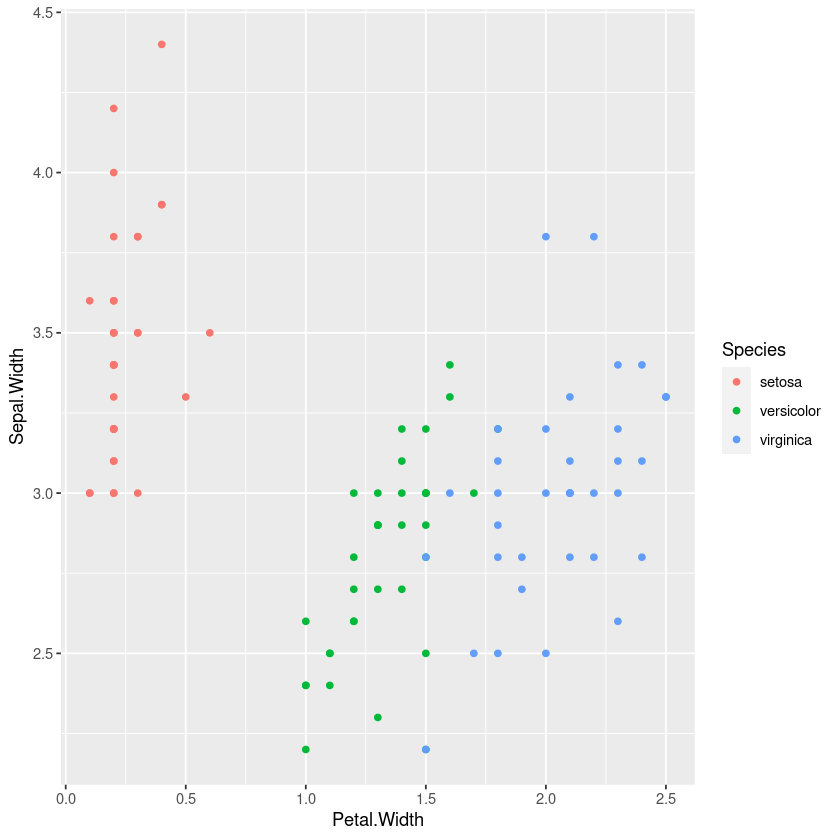

In [15]:
g <- NULL
g <- ggplot(data = training, aes(x = Petal.Width, y = Sepal.Width, color=Species))
g <- g + geom_point()
g # seems it fits for tree classification

In [16]:
modFit <- train(Species ~., method = 'rpart', data = training)
print(modFit$finalModel)

n= 105 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 105 70 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.45 35  0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 70 35 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Length< 4.75 33  1 versicolor (0.00000000 0.96969697 0.03030303) *
    7) Petal.Length>=4.75 37  3 virginica (0.00000000 0.08108108 0.91891892) *


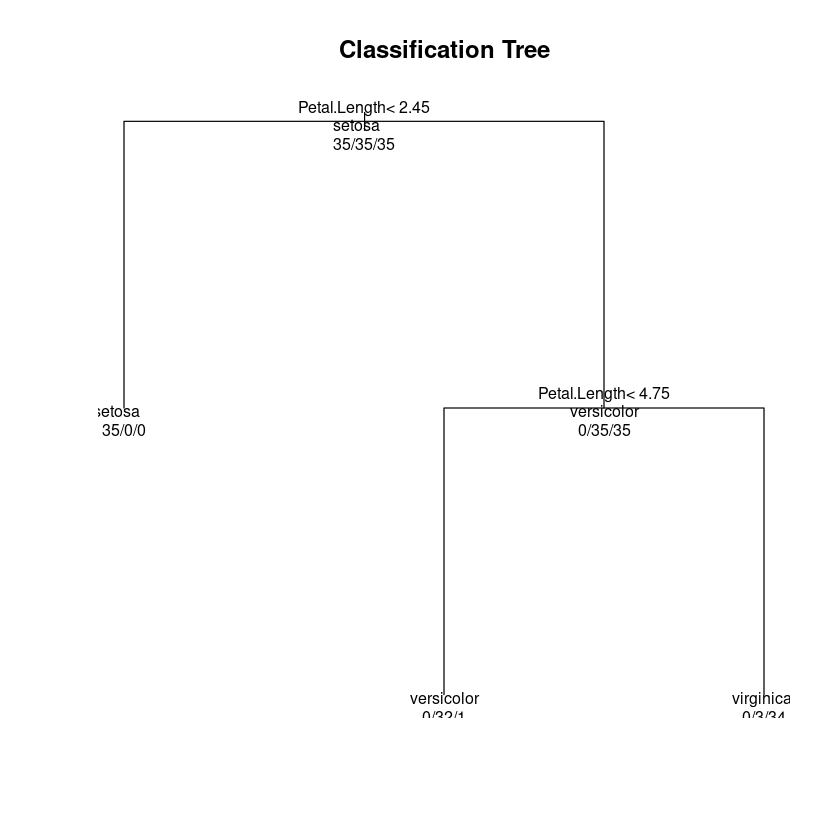

In [20]:
plot(modFit$finalModel, uniform = TRUE, main = "Classification Tree")
text(modFit$finalModel, use.n = TRUE, all = TRUE, cex = .8)

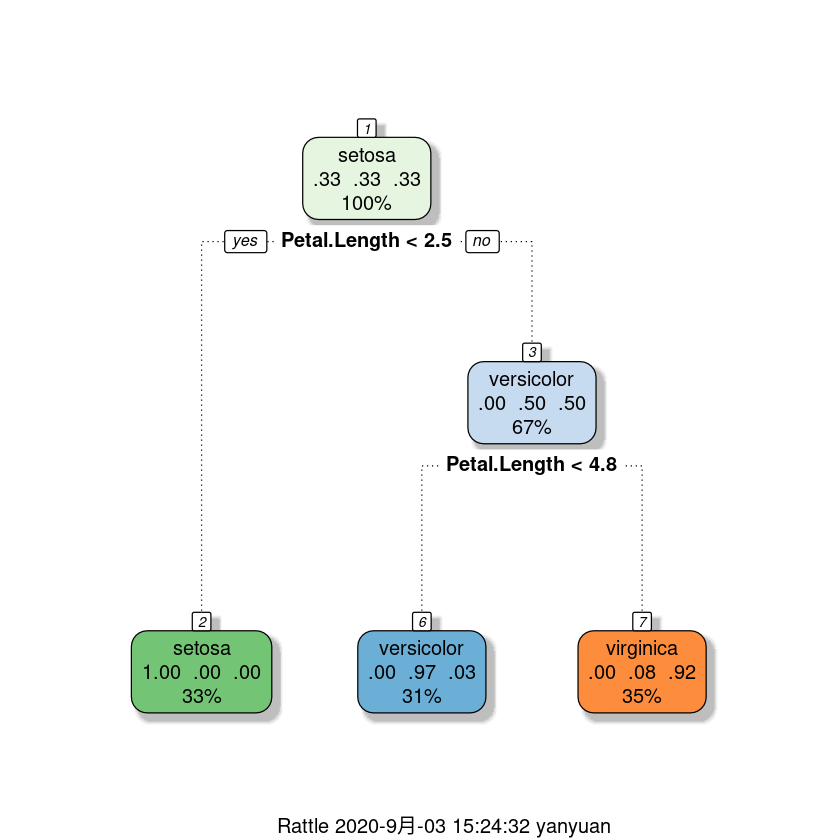

In [22]:
#install.packages("rattle")
library(rattle)
fancyRpartPlot(modFit$finalModel)

In [23]:
# Predict new values
predict(modFit, newdata = testing)

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     virginica  versicolor versicolor
[19] versicolor versicolor versicolor versicolor virginica  virginica 
[25] versicolor versicolor versicolor versicolor versicolor versicolor
[31] virginica  virginica  virginica  virginica  virginica  virginica 
[37] virginica  virginica  virginica  virginica  virginica  virginica 
[43] virginica  virginica  virginica 
Levels: setosa versicolor virginica

### Bagging (Bootstrap aggregating)
When you fit complicated models, sometimes when you average the models together, you get a smoother model fit, that gives you a better balance between potential bias in your fit and variance in your fit

**Basic idea**
- Resample cases and recalculate predictions
- Average or majority vote

**Notes**
- Similar bias
- Reduced variance
- More useful for non-linear functions

In [29]:
# install.packages("ElemStatLearn") # it's no longer avaiable
# So we go to github site of ElemStatLearn to download latest tar.gz
load("./data/ElemStatLearn/data/ozone.RData")
ozone <- ozone[order(ozone$ozone),]
head(ozone)

,ozone,radiation,temperature,wind
,<dbl>,<int>,<int>,<dbl>
17,1,8,59,9.7
19,4,25,61,9.7
14,6,78,57,18.4
45,7,48,80,14.3
106,7,49,69,10.3
7,8,19,61,20.1


In [30]:
dim(ozone)

[1] 111   4

In [32]:
## Bagged loess
ll <- matrix(NA, nrow = 10, ncol = 155)
for (i in 1:10){
    ss <- sample(1:dim(ozone)[1], replace = TRUE)
    ozone0 <- ozone[ss, ]
    ozone0 <- ozone0[order(ozone0$ozone), ]
    loess0 <- loess(temperature ~ ozone, data = ozone0, span = 0.2)
    ll[i, ] <- predict(loess0, newdata=data.frame(ozone=1:155))
}

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 21”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 2”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1.1772e-16”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 18”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 2”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  7.773e-17”


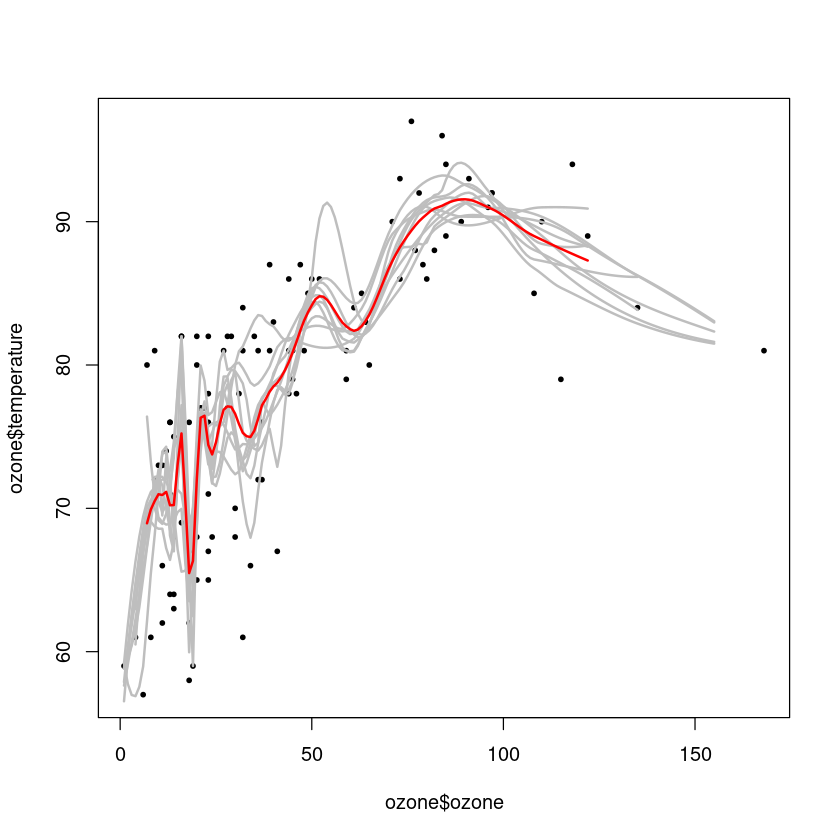

In [39]:
plot(ozone$ozone, ozone$temperature, pch = 19, cex = 0.5)

for(i in 1:10){lines(1:155, ll[i,], col = 'grey', lwd = 2)}
lines(1:155, apply(ll, 2, mean), col = 'red', lwd = 2)

#### Bagging in caret
- Some models perform bagging for you, in `train` function consider `method` options
    - `bagEarth`
    - `treebag`
    - `bagFDA`
- Alternatively you can bag any model you choose using the `bag` function

### Random Forests
1. Bootstrap samples
1. At each split, bootstrap variables
1. Grow multiple trees and vote

**Pros**
1. Accuracy

**Cons**
1. Speed
1. Interpretability
1. Overfitting

In [45]:
library(ggplot2)
library(caret)
library(randomForest)
data(iris)
inTrain <- createDataPartition(
    y = iris$Species
    , p = 0.7
    , list = FALSE
)
training <- iris[inTrain,]
testing <- iris[-inTrain,]
dim(training);dim(testing)

[1] 105   5

[1] 45  5

In [46]:
modFit <- train(Species ~ ., data = training, method = "rf", prox = TRUE)
modFit

Random Forest 

105 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 105, 105, 105, 105, 105, 105, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.9458160  0.9176879
  3     0.9458930  0.9178406
  4     0.9414466  0.9111908

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 3.

In [47]:
# get a single tree
getTree(modFit$finalModel, k = 2)

,left daughter,right daughter,split var,split point,status,prediction
1,2,3,3,2.45,1,0
2,0,0,0,0.00,-1,1
3,4,5,3,4.85,1,0
4,6,7,1,4.95,1,0
5,8,9,3,5.05,1,0
6,0,0,0,0.00,-1,3
7,0,0,0,0.00,-1,2
8,10,11,4,1.75,1,0
9,0,0,0,0.00,-1,3
10,0,0,0,0.00,-1,2


In [60]:
irisP

,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<chr>
setosa,1.4,0.2,setosa
versicolor,4.4,1.3,versicolor
virginica,5.6,2.1,virginica


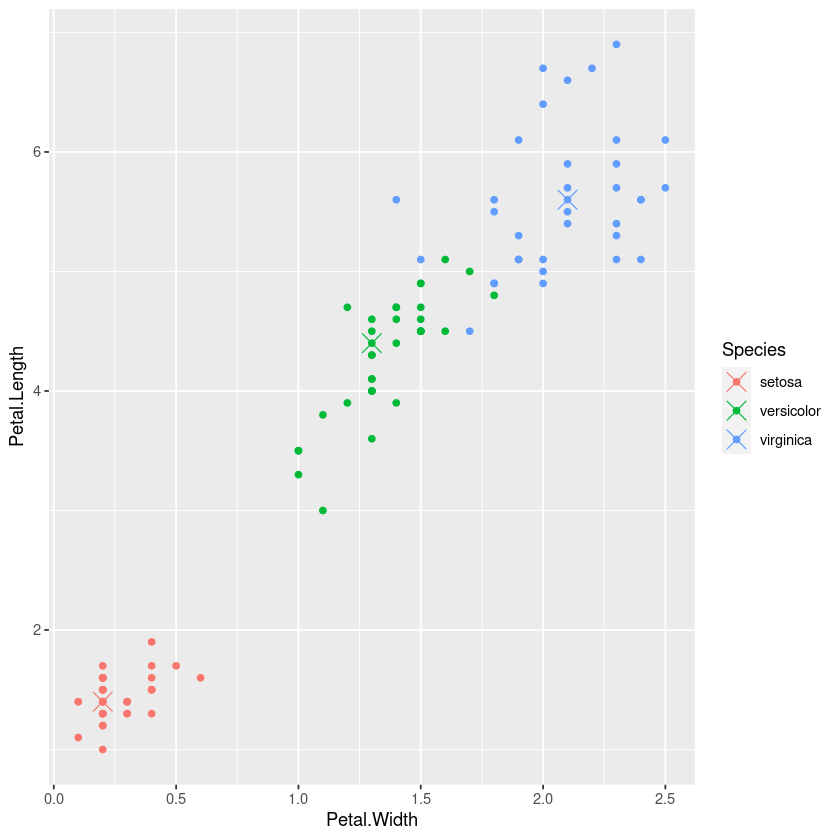

In [65]:
irisP <- classCenter(training[,c(3,4)]
                    , training$Species
                    , modFit$finalModel$prox)
irisP <- as.data.frame(irisP)
irisP$Species <- rownames(irisP)
#g <- NULL
g <- ggplot(data = training, aes(x = Petal.Width, y = Petal.Length, col = Species)) + geom_point()
g <- g + geom_point(aes( x = Petal.Width, y = Petal.Length, col = Species), size = 5, shape = 4, data = irisP)
g

In [66]:
# Predict new values
pred <- predict(modFit, testing)
testing$predRight <- pred == testing$Species
table(pred, testing$Species)

            
pred         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         3
  virginica       0          0        12

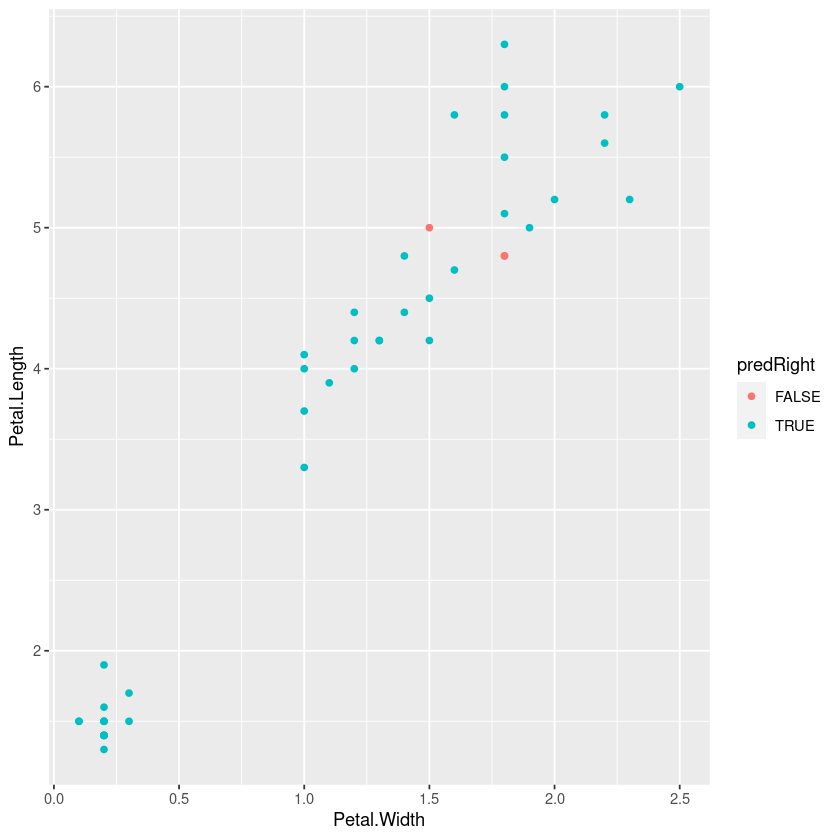

In [68]:
g <- NULL
g <- ggplot(data = testing, aes(x = Petal.Width, y = Petal.Length, colour = predRight), main = "newdata Predictions")
g <- g + geom_point()
g 

**Notes**
- Random forests are usually one of the two top performing algorithms along with boosting in prediction contests
- Random forests are difficult to interpret but often very accurate
- Care should be taken to avoid overfitting (see `rfcv` function)

### Boosting
**Basic Idea**
- Take lots of (possibly) weak predictors
- Weight them and add them up
- Get a stronger predictor

**Basic Idea behind boosting**
1. Start with a set of classifier $h_1, \ldots, h_k$
    - Examples: All possible trees, all possible regression models, all possible cutoffs
1. Create a classifier that combines classification functions : $f(x) = \text{sgn} \left( \sum_{t=1}^{T} \alpha_t h_t(x) \right) $
    - Goal is to minimize error (on training set)
    - Iterative, select one $h$ at each step
    - Calculate weights based on errors
    - Upweight missed classifications and select next $h$

e.g. Adaboost

**Boosting in R**
- Bossting can be used with any subset of classifiers
- One large subclass is **Gradient Boosting**
- R has multiple boosting libraries. Differences include the choice of basic classification functions and combination rules
    - `gbm`: boosting with trees
    - `mboost`: model based boosting
    - `ada`: statistical boosting based on `additive logistic regression`
    - `gamBoost`: for boosting generalized additive models
- Most of these are available in the caret package

In [80]:
## Wage example
library(ISLR)
data(Wage)
library(caret)
library(ggplot2)

Wage <- subset(Wage, select = -c(logwage))
inTrain <- createDataPartition(y=Wage$wage
                              , p = 0.7
                              , list = FALSE
                              )
training <- Wage[inTrain,]
testing <- Wage[-inTrain,]

In [81]:
head(training)

,year,age,maritl,race,education,region,jobclass,health,health_ins,wage
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,70.47602
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,130.98218
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,154.68529
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,75.04315
228963,2006,41,1. Never Married,2. Black,3. Some College,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,118.88436
81404,2004,52,2. Married,1. White,2. HS Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,128.68049


In [83]:
## Fit the model
modFit <- train(wage ~ ., method = 'gbm', verbose = FALSE, data = training) 
# gbm: boosting with trees
# verbose=FALSE, coz this will produce a lot of output when you
# use method="gbm" -- seems it does not work in Jupyter environment...

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 14: region2. Middle Atlantic has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 15: region3. East North Central has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 16: region4. West North Central has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 17: region5. South Atlantic has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 18: region6. East South Central has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 19: region7. West South Central has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution 

In [84]:
print(modFit)
# there's a different number of trees that are used, and different interaction depths
# and they are basically used together, to build a boosted version of regression trees

Stochastic Gradient Boosting 

2102 samples
   9 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 2102, 2102, 2102, 2102, 2102, 2102, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  RMSE      Rsquared   MAE     
  1                   50      34.71048  0.3316549  23.79935
  1                  100      34.15689  0.3396577  23.48178
  1                  150      34.08862  0.3404730  23.48160
  2                   50      34.17122  0.3404850  23.45018
  2                  100      34.04020  0.3422378  23.46318
  2                  150      34.11753  0.3391094  23.57442
  3                   50      34.09903  0.3409394  23.45576
  3                  100      34.26459  0.3344203  23.68407
  3                  150      34.50438  0.3268291  23.91318

Tuning parameter 'shrinkage' was held constant at a value of 0.1

Tuning parameter 'n.minobsinnode' was held constant at a value of 10
RMSE was used to select the optimal mo

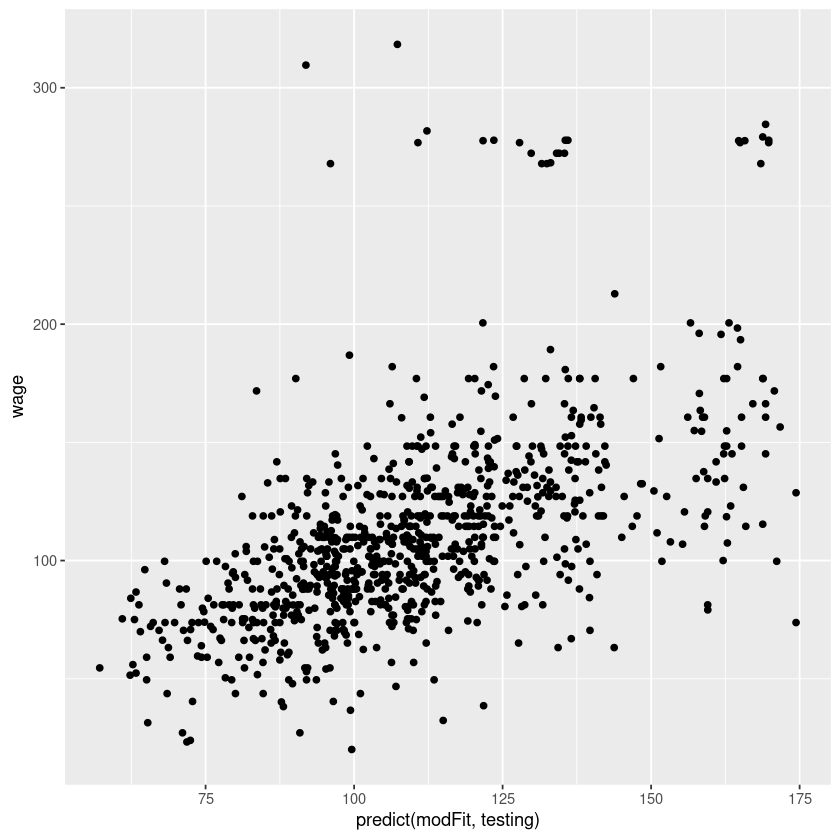

In [85]:
## Plot the results
qplot(predict(modFit, testing), wage, data = testing)

### Model based approach
**Basic idea**
1. Assume the data foloow a probabilistic model
1. Use Bayes' theorem to identify optimal classifiers

**Pros**
1. Can take advantage of structure of the data
1. May be computationally convenient
1. Are reasonably accurate on real problems

**Cons**
1. Make additional assumptions about the data
1. When the model is incorrect you may get reduced accuracy

**Model Based Approach**
1. Our goal is to build parametric model for conditional distribution $P(Y=k | X =x )$

2. A typical approach is to apply *Bayes Theorem*

$P(Y = k | X =x ) = \frac{p(X=x|Y=k) p(Y=k)}{\sum_{\ell = 1}^{K} P(X = x | Y = \ell) P(Y = \ell)}$

$P(Y = k | X = x) = \frac{f_{k}(x) \pi_{k}}{\sum_{\ell = 1}^{K} f_{\ell}(x) \pi_{\ell}}$

3. Typically *prior probabilities* $\pi_{k}$ are set in advance

4. A common choice for $f_k (x) = \frac{1}{\sigma_{k} \sqrt{2 \pi}} \exp \left[- \frac{\left( x - \mu_k \right)^2}{\sigma_{k}^{2}} \right]$, a Gaussian distribution

5. Estimate the parameters $(\mu_k, \sigma_k^2)$ from the data

6. Classify to the class with the highest value of $P(Y = K | X = x)$

**Classifying using the model**

A range of models use this approach
- `Linear discriminant analysis` assumes $f_k(x)$ is multivariate Gaussian with same covariances
- `Quadratic discriminant analysis` assumes $f_k(x)$ is multivariate Gaussian with different covariances
- `Model based prediction` assumes more complicated versions for the covariance matrix
- `Naive Bayes` assumes independence between features for model building


**Why`Linear discriminant analysis`？**

$\log \frac{P(Y=k | X = x)}{P(Y=j | X = x)} = \log \frac{f_k(x)}{f_j(x)} + \log \frac{\pi_k}{\pi_j} = \log \frac{\pi_k}{\pi_j} - \frac{1}{2} \left( \mu_k + \mu_j \right)^{T} \Sigma^{-1} \left( \mu_k + \mu_j \right) + x^{T} \Sigma^{-1} \left( \mu_k - \mu_j \right) $

**Discriminant function**

$\delta_k(x) = x^{T} \Sigma^{-1} \mu_k - \frac{1}{2} \mu_k  \Sigma^{-1} \mu_k + \log (\mu_k)$

- Decice on class based on $\hat{Y}(x) = \text{argmax}_{k} \delta_{k}(x)$
- We usually estimate parameters with maximum likelihood

**Naive Bayes**

- Suppose we have many predictors, we would want to model $P(Y=k|X1, \ldots, X_m)$
- We could use Bayes Theorem to get

    $P(Y=k|X1, \ldots, X_m) = \frac{\pi_k P(X1, \ldots, X_m | Y=k)}{ \pi_{\ell} \sum_{\ell = 1}^{K} P(X1, \ldots, X_m | Y=k)} \propto \pi_{k} P(X1, \ldots, X_m | Y=k)$
- This can be written as

    $P(X1, \ldots, X_m | Y=k) = \pi_k P(X_1 | Y=k) P(X_2, \ldots, X_m | X_1, Y=k)$  
    $= \pi_k P(X_1 | Y=k) P(X_2 |X_1, Y=k) P(X_3, \ldots, X_m | X_1, X2, Y=k)$  
    $= \pi_k P(X_1 | Y=k) P(X_2 |X_1, Y=k) P(X_3 |X_1, X_2, Y=k) \ldots P(X_m | X_1, \ldots, X_{m-1}  Y=k)$  
    
- We could make an assumption to write this  
    $\approx \pi_k P(X_1 | Y=k) P(X_2 | Y=k) \ldots P(X_m | Y=k)$
    

In [86]:
data(iris)
library(ggplot2)
names(iris)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

In [87]:
table(iris$Species)


    setosa versicolor  virginica 
        50         50         50 

In [88]:
inTrain <- createDataPartition(
    y = iris$Species
    , p = 0.7
    , list = FALSE
)
training <- iris[inTrain,]
testing <- iris[-inTrain,]
dim(training);dim(testing)

[1] 105   5

[1] 45  5

In [90]:
# build predictions
modlda <- train(Species ~., data = training, method = "lda")
modnb <- train(Species ~., data = training, method = "nb") # naive bayes
plda = predict(modlda, testing)
pnb = predict(modnb, testing)
table(plda, pnb)

            pnb
plda         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         14         0
  virginica       0          0        16

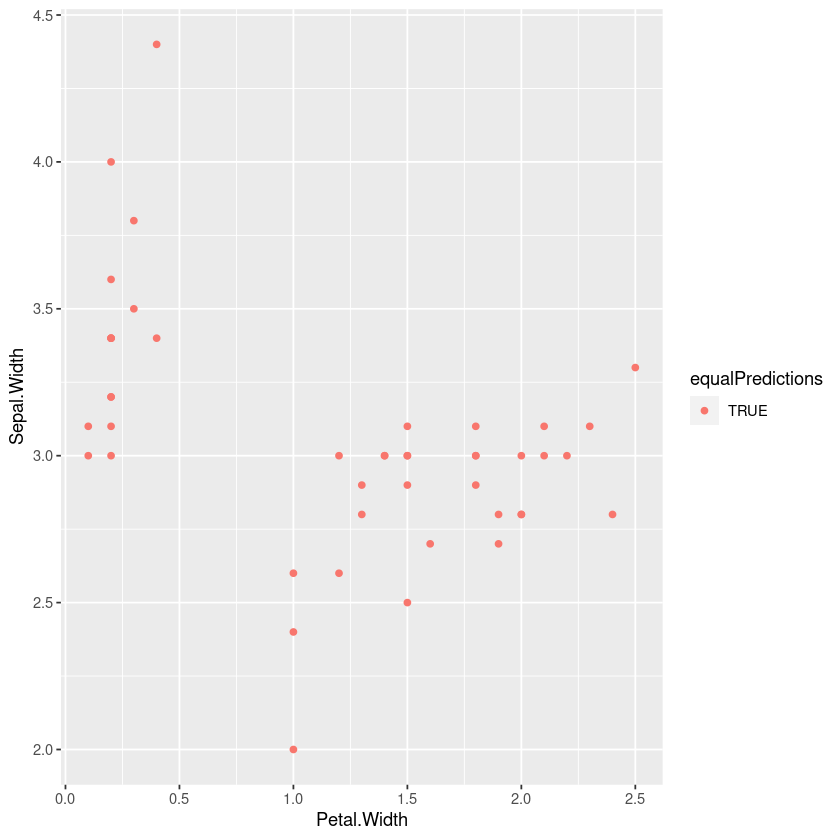

In [92]:
# Comparison of results
equalPredictions <- (plda == pnb)
qplot(Petal.Width, Sepal.Width, colour = equalPredictions, data = testing)

## Quiz 3
### Question 1

1. Subset the data to a training set and testing set based on the Case variable in the data set.

2. Set the seed to 125 and fit a CART model with the rpart method using all predictor variables and default caret settings.

3. In the final model what would be the final model prediction for cases with the following variable values:

    a. TotalIntench2 = 23,000; FiberWidthCh1 = 10; PerimStatusCh1=2
    
    b. TotalIntench2 = 50,000; FiberWidthCh1 = 10;VarIntenCh4 = 100
    
    c. TotalIntench2 = 57,000; FiberWidthCh1 = 8;VarIntenCh4 = 100
    
    d. FiberWidthCh1 = 8;VarIntenCh4 = 100; PerimStatusCh1=2 

In [127]:
library(AppliedPredictiveModeling)
data(segmentationOriginal)
library(caret)

inTrain = createDataPartition(y = segmentationOriginal$Case
                             , p = 0.6
                             , list = FALSE)
training = segmentationOriginal[inTrain,]
testing = segmentationOriginal[-inTrain,]
dim(training); dim(testing)

[1] 1212  119

[1] 807 119

In [132]:
set.seed(125)
modFit <- train(Class~., data = training, method="rpart")

In [133]:
modFit$finalModel

n= 1212 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 1212 436 PS (0.64026403 0.35973597)  
  2) TotalIntenCh2< 42198.5 514  29 PS (0.94357977 0.05642023) *
  3) TotalIntenCh2>=42198.5 698 291 WS (0.41690544 0.58309456)  
    6) FiberWidthCh1< 11.19756 303 121 PS (0.60066007 0.39933993) *
    7) FiberWidthCh1>=11.19756 395 109 WS (0.27594937 0.72405063) *

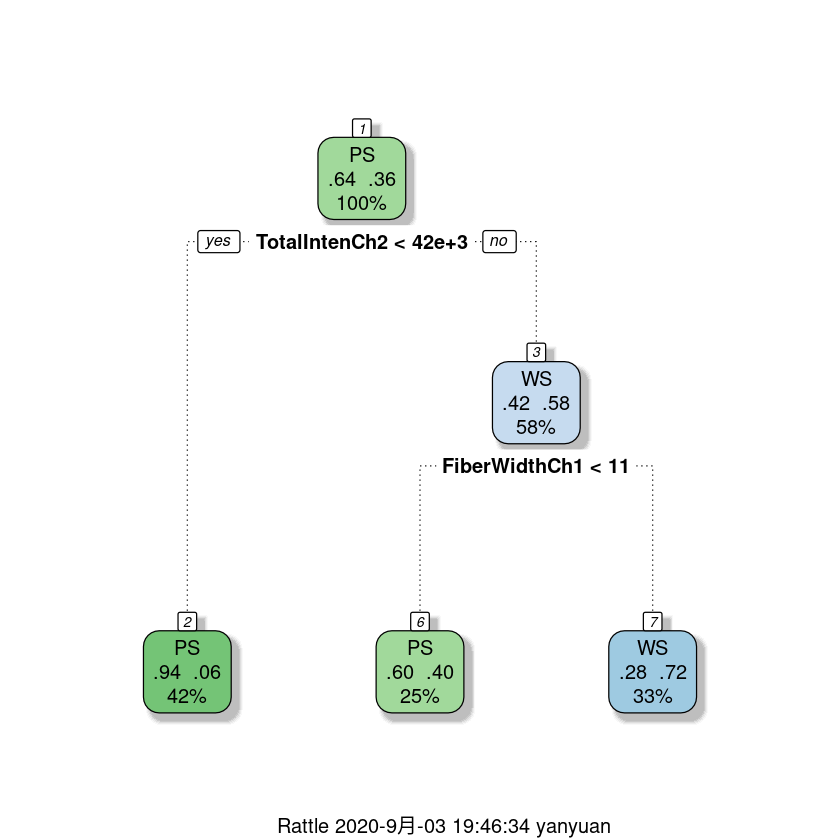

In [134]:
library(rattle)
library(rpart.plot)
fancyRpartPlot(modFit$finalModel)

### Question 2

### Question 3

In [137]:
library(pgmm)
data(olive)
olive = olive[,-1]

In [139]:
inTrain <- createDataPartition(
    y = olive$Area
    , list = FALSE
    , p = 0.7
)
training <- olive[inTrain, ]
testing <- olive[-inTrain,]

In [141]:
modFit <- train(Area ~., data = training, method = "rpart")
modFit$finalModel

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


n= 401 

node), split, n, deviance, yval
      * denotes terminal node

1) root 401 2207.0870 4.613466  
  2) Eicosenoic>=6.5 224  117.7143 2.785714 *
  3) Eicosenoic< 6.5 177  394.0452 6.926554  
    6) Linoleic>=1053.5 72   16.0000 5.333333 *
    7) Linoleic< 1053.5 105   69.9619 8.019048 *

In [144]:
round(predict(modFit, newdata = as.data.frame(t(colMeans(olive)))),3)

1 
2.786

In [145]:
colMeans(olive)

Area    Palmitic Palmitoleic     Stearic       Oleic    Linoleic 
    4.59965  1231.74126   126.09441   228.86538  7311.74825   980.52797 
  Linolenic   Arachidic  Eicosenoic 
   31.88811    58.09790    16.28147

### Question 4

In [191]:
#library(ElemStatLearn)
load("./data/ElemStatLearn/data/SAheart.RData")
set.seed(8484)
train = sample(1:dim(SAheart)[1],size=dim(SAheart)[1]/2,replace=F)
trainSA = SAheart[train,]
testSA = SAheart[-train,]

In [192]:
head(trainSA)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
,<int>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<dbl>,<dbl>,<int>,<int>
368,150,0.00,4.99,27.73,Absent,57,30.92,8.33,24,0
238,176,5.76,4.89,26.10,Present,46,27.30,19.44,57,0
221,138,0.00,3.14,12.00,Absent,54,20.28,0.00,16,0
316,190,5.15,6.03,36.59,Absent,42,30.31,72.00,50,0
327,156,0.00,3.47,21.10,Absent,73,28.40,0.00,36,1
41,118,0.28,5.80,33.70,Present,60,30.98,0.00,41,1


In [193]:
name_list = c("chd", "age", 'alcohol', 'obesity', 'tobacco', 'typea', 'ldl')

In [200]:
set.seed(13234)
#modFit <- train(chd~., data = trainSA[,name_list], method='glm', family="binomial")
modFit <- train(chd ~ age + alcohol + obesity + tobacco + typea + ldl, data = trainSA, method = "glm", family = "binomial")

Warning message in train.default(x, y, weights = w, ...):
“You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column.”


In [201]:
modFit$finalModel


Call:  NULL

Coefficients:
(Intercept)          age      alcohol      obesity      tobacco        typea  
  -4.114985     0.052552     0.004216    -0.058587     0.043858     0.027646  
        ldl  
   0.160496  

Degrees of Freedom: 230 Total (i.e. Null);  224 Residual
Null Deviance:	    285 
Residual Deviance: 245.5 	AIC: 259.5

In [202]:
trainPd <- predict(modFit, newdata = trainSA)
testPd <- predict(modFit, new_data = testSA)

In [203]:
missClass = function(values,prediction){sum(((prediction > 0.5)*1) != values)/length(values)}

In [205]:
round(missClass(trainSA$chd, trainPd),2)

[1] 0.31

In [204]:
round(missClass(testSA$chd, testPd),3)

[1] 0.398

### Question 5

In [209]:
library(randomForest)
load("./data/ElemStatLearn/data/vowel.train.RData")
load("./data/ElemStatLearn/data/vowel.test.RData")
set.seed(33833)

In [210]:
str(vowel.train)

'data.frame':	528 obs. of  11 variables:
 $ y   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ x.1 : num  -3.64 -3.33 -2.12 -2.29 -2.6 ...
 $ x.2 : num  0.418 0.496 0.894 1.809 1.938 ...
 $ x.3 : num  -0.67 -0.694 -1.576 -1.498 -0.846 ...
 $ x.4 : num  1.779 1.365 0.147 1.012 1.062 ...
 $ x.5 : num  -0.168 -0.265 -0.707 -1.053 -1.633 ...
 $ x.6 : num  1.627 1.933 1.559 1.06 0.764 ...
 $ x.7 : num  -0.388 -0.363 -0.579 -0.567 0.394 0.217 0.322 -0.435 -0.512 -0.466 ...
 $ x.8 : num  0.529 0.51 0.676 0.235 -0.15 -0.246 0.45 0.992 0.928 0.702 ...
 $ x.9 : num  -0.874 -0.621 -0.809 -0.091 0.277 0.238 0.377 0.575 -0.167 0.06 ...
 $ x.10: num  -0.814 -0.488 -0.049 -0.795 -0.396 -0.365 -0.366 -0.301 -0.434 -0.836 ...


In [211]:
modelFit <- randomForest(y ~ ., data = vowel.train)

In [214]:
order(varImp(modelFit), decreasing = TRUE)

[1]  2  1  6  8  5  4  9  3 10  7